In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/Users/deepikatigulla/Downloads/breast-cancer (1).csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
#logistic regression

In [9]:
y = data.iloc[:, 1:2]
x = data.iloc[:,2:]
x,y

(     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      compactness_mean  concavity_mean  concave po

In [10]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)


In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [12]:
x_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

1) logistic regression

In [13]:

# Create a logistic regression model and fit it to the training data
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Predict on the test data using the trained model
y_pred1 = lr_model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

con_mat = confusion_matrix(y_test, y_pred1)
print(con_mat)
print(metrics.classification_report(y_test,y_pred1))


Accuracy: 0.9649122807017544
[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        67
           M       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [14]:
from sklearn import metrics
model = LogisticRegression()
model.fit(x_train, y_train)

predicted_train1 = model.predict(x_train)
predicted_test1 = model.predict(x_test)

conf = metrics.confusion_matrix(y_test, predicted_test1)
print ("Confusion Matrix : \n", conf)

print("The train accuracy of Logistic Regression model is : ", metrics.accuracy_score(y_train, predicted_train1))
print("The test accuracy of Logistic Regression model is : ", metrics.accuracy_score(y_test, predicted_test1))

Confusion Matrix : 
 [[65  2]
 [ 2 45]]
The train accuracy of Logistic Regression model is :  0.989010989010989
The test accuracy of Logistic Regression model is :  0.9649122807017544


In [15]:


skfold = StratifiedKFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(lr_model, x,y, cv=skfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(lr_model, x,y, cv=skfold))))


Cross-validation scores:
[0.93157895 0.97368421 0.93121693]
Cross-validation scores:
0.9454933630372228


In [16]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(lr_model, x,y, cv=kfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(lr_model, x,y, cv=kfold))))


Cross-validation scores:
[0.9122807  0.93859649 0.97368421 0.94736842 0.95575221]
Cross-validation scores:
0.9455364073901567


In [17]:


# Define the logistic regression model
logreg = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear']  # Solver algorithm
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_predg = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)




Best Hyperparameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Accuracy Score:  0.9824175824175825
Test Accuracy Score:  0.9649122807017544


2)naive bayes

In [18]:

# Initialize the Naive Bayes classifier
clf = GaussianNB()

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred2 = clf.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy:", accuracy)

con_mat = confusion_matrix(y_test, y_pred2)
print(con_mat)
print(metrics.classification_report(y_test,y_pred2))

Accuracy: 0.9035087719298246
[[61  6]
 [ 5 42]]
              precision    recall  f1-score   support

           B       0.92      0.91      0.92        67
           M       0.88      0.89      0.88        47

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114



In [19]:
Gmodel = GaussianNB()
Gmodel.fit(x_train, y_train)

predicted_train2 = Gmodel.predict(x_train)
predicted_test2 = Gmodel.predict(x_test)

print("The train accuracy of Gaussian Naive Bayes model is : ", metrics.accuracy_score(y_train, predicted_train2))
print("The test accuracy of Gaussian Naive Bayes model is : ", metrics.accuracy_score(y_test, predicted_test2))

The train accuracy of Gaussian Naive Bayes model is :  0.9472527472527472
The test accuracy of Gaussian Naive Bayes model is :  0.9035087719298246


In [20]:

skfold = StratifiedKFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(Gmodel, x,y, cv=skfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(Gmodel, x,y, cv=skfold))))

Cross-validation scores:
[0.91578947 0.94736842 0.94708995]
Cross-validation scores:
0.9367492806089297


In [21]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(Gmodel, x,y, cv=kfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(Gmodel, x,y, cv=kfold))))

Cross-validation scores:
[0.87719298 0.92105263 0.95614035 0.97368421 0.95575221]
Cross-validation scores:
0.9367644775655954


In [22]:

# Define the Naive Bayes model
nb = GaussianNB()

# Define the parameter grid for grid search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_predg = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)


Best Hyperparameters:  {'var_smoothing': 1e-09}
Best Accuracy Score:  0.9472527472527472
Test Accuracy Score:  0.9035087719298246


3)svm

In [23]:

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred3 = svm_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy:", accuracy)
con_mat = confusion_matrix(y_test, y_pred3)
print(con_mat)
print(metrics.classification_report(y_test,y_pred3))


Accuracy: 0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           B       0.97      1.00      0.99        67
           M       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [24]:
model = SVC()
model.fit(x_train, y_train)
  
predicted_train3 = model.predict(x_train)
predicted_test3 = model.predict(x_test)

print("The train accuracy of SVM model is : ", metrics.accuracy_score(y_train, predicted_train3))
print("The test accuracy of SVM model is : ", metrics.accuracy_score(y_test, predicted_test3))

con_mat = confusion_matrix(y_test, predicted_test3)
con_mat

The train accuracy of SVM model is :  0.9846153846153847
The test accuracy of SVM model is :  0.9824561403508771


array([[67,  0],
       [ 2, 45]])

In [25]:
skfold = StratifiedKFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(svm_classifier, x,y, cv=skfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(svm_classifier, x,y, cv=skfold))))

Cross-validation scores:
[0.85263158 0.93157895 0.94708995]
Cross-validation scores:
0.9104334911352455


In [26]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(svm_classifier, x,y, cv=kfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(svm_classifier, x,y, cv=kfold))))

Cross-validation scores:
[0.77192982 0.90350877 0.97368421 0.93859649 0.94690265]
Cross-validation scores:
0.9069243906225741


In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


X_trainval, X_test, y_trainval, y_test = train_test_split( x,y, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split( X_trainval, y_trainval, random_state=1) 
print("Size of training set: {} size of validation set: {} size of test set:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0])) 
best_score = 0 
for C in [0.001, 0.01, 0.1, 1, 10, 100]: 
    svm = SVC(C=C) 
    svm.fit(X_train, y_train) 
    score = svm.score(X_valid, y_valid) 
    if score > best_score: 
        best_score = score 
        best_parameters = {'C': C}
svm = SVC(**best_parameters) 
svm.fit(X_trainval, y_trainval) 
test_score = svm.score(X_test, y_test) 
print("Best score on validation set: {:.2f}".format(best_score)) 
print("Best parameters: ", best_parameters) 
print("Test set score with best parameters: {:.2f}".format(test_score))


Size of training set: 319 size of validation set: 107 size of test set: 143

Best score on validation set: 0.93
Best parameters:  {'C': 1}
Test set score with best parameters: 0.94


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
from sklearn.metrics import classification_report

# Define the SVM model
svm = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_preds = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)


classification_rep = classification_report(y_test, y_preds)
print("Classification Report:\n", classification_rep)


Best Hyperparameters:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy Score:  0.9758241758241759
Test Accuracy Score:  0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        67
           M       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



 4)knn

In [29]:

clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_pred4 = clf.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy:", accuracy)
con_mat = confusion_matrix(y_test, y_pred4)
print(con_mat)
print(metrics.classification_report(y_test,y_pred4))

Accuracy: 0.956140350877193
[[67  0]
 [ 5 42]]
              precision    recall  f1-score   support

           B       0.93      1.00      0.96        67
           M       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [30]:


skfold = StratifiedKFold(n_splits=3)

print("Cross-validation scores:\n{}".format(cross_val_score(clf,x,y, cv=skfold)))
print("mean Cross-validation scores:\n{}".format(np.mean(cross_val_score(clf,x,y, cv=skfold))))
con_mat = confusion_matrix(y_test, y_pred4)
con_mat


Cross-validation scores:
[0.9        0.94736842 0.92063492]
mean Cross-validation scores:
0.9226677805625174


array([[67,  0],
       [ 5, 42]])

In [31]:

kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(clf,x,y, cv=kfold)))
print("mean Cross-validation scores:\n{}".format(np.mean(cross_val_score(clf,x,y, cv=kfold))))
con_mat = confusion_matrix(y_test, y_pred4)
con_mat

Cross-validation scores:
[0.85964912 0.92105263 0.96491228 0.94736842 0.9380531 ]
mean Cross-validation scores:
0.9262071106970966


array([[67,  0],
       [ 5, 42]])

In [32]:
Kmodel = KNeighborsClassifier(n_neighbors = 1)  
Kmodel.fit(x_train, y_train)

predicted_train4 = Kmodel.predict(x_train)
predicted_test4 = Kmodel.predict(x_test)

print(metrics.confusion_matrix(y_test, predicted_test4))
print("The train accuracy of KNN model is : ", metrics.accuracy_score(y_train, predicted_train4)*100)
print("The test accuracy of KNN model is : ", metrics.accuracy_score(y_test, predicted_test4)*100)

[[65  2]
 [ 4 43]]
The train accuracy of KNN model is :  100.0
The test accuracy of KNN model is :  94.73684210526315


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': range(1,20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_predk = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)


Best Hyperparameters:  {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best Accuracy Score:  0.9692307692307693
Test Accuracy Score:  0.9473684210526315


In [34]:
kmodel = KNeighborsClassifier(n_neighbors = 11)  
kmodel.fit(x_train, y_train)

predicted_traink = kmodel.predict(x_train)
predicted_testk = kmodel.predict(x_test)

print(metrics.confusion_matrix(y_test, predicted_testk))
print("The train accuracy of KNN model is : ", metrics.accuracy_score(y_train, predicted_traink))
print("The test accuracy of KNN model is : ", metrics.accuracy_score(y_test, predicted_testk))

[[66  1]
 [ 4 43]]
The train accuracy of KNN model is :  0.9758241758241758
The test accuracy of KNN model is :  0.956140350877193


5)random forest

In [35]:

# Initialize the Random Forest classifier
Random = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
Random.fit(x_train, y_train)

# Make predictions on the test data
y_pred5 = Random.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy:", accuracy)

con_mat = confusion_matrix(y_test, y_pred5)
con_mat


Accuracy: 0.9736842105263158


array([[65,  2],
       [ 1, 46]])

In [36]:
skfold = StratifiedKFold(n_splits=3)
print("Cross-validation scores:\n{}".format(cross_val_score(Random, x,y, cv=skfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(Random, x,y, cv=skfold))))

Cross-validation scores:
[0.94210526 0.96842105 0.96296296]
Cross-validation scores:
0.9578297595841455


In [37]:
kfold = KFold(n_splits=5)
print("Cross-validation scores:\n{}".format(cross_val_score(Random, x,y, cv=kfold)))
print("Cross-validation scores:\n{}".format(np.mean(cross_val_score(Random, x,y, cv=kfold))))

Cross-validation scores:
[0.9122807  0.96491228 0.98245614 0.95614035 0.98230088]
Cross-validation scores:
0.9596180717279925


In [38]:
rmodel=RandomForestClassifier(random_state = 1) 
rmodel.fit(x_train, y_train)

predicted_trainr = rmodel.predict(x_train)
predicted_testr = rmodel.predict(x_test)

print(metrics.confusion_matrix(y_test, predicted_testr))
print("The train accuracy of KNN model is : ", metrics.accuracy_score(y_train, predicted_trainr)*100, "%")
print("The test accuracy of KNN model is : ", metrics.accuracy_score(y_test, predicted_testr)*100, "%")

[[64  3]
 [ 3 44]]
The train accuracy of KNN model is :  100.0 %
The test accuracy of KNN model is :  94.73684210526315 %


In [39]:
predicted = rmodel.predict(x_test)

In [40]:
predicted

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B'], dtype=object)

In [41]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

           B       0.96      0.96      0.96        67
           M       0.94      0.94      0.94        47

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



In [42]:

# Define the Random Forest model
rf = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [60,70,80,100, ],
    'max_depth': [None, 5, 10],
    'max_depth': [5,6,7],
    'max_features': [4,5,6],
    'min_samples_leaf': [2, 4,10,15],
    'min_samples_split': [10,50,60,70],  
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)



# Get the best estimator (fitted model) from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(x_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

# Evaluate the model on the test set
test_score = grid_search.score(x_test, y_test)
print("Test Accuracy Score: ", test_score)


Best Hyperparameters:  {'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best Accuracy Score:  0.9582417582417582
Test Accuracy Score:  0.956140350877193


In [43]:
print(grid_search.best_params_) #best parameters of logit for tuning

best_grid = grid_search.best_estimator_ #acquiring the best estimator for logit
print(best_grid)

{'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
RandomForestClassifier(max_depth=6, max_features=4, min_samples_leaf=2,
                       min_samples_split=10)


In [44]:
grid_rfcl_train_acc = best_grid.score(x_train,y_train) 
print('Accuracy score for train data',grid_rfcl_train_acc)

grid_rfcl_test_acc = best_grid.score(x_test,y_test)
print('Accuracy score for test data',grid_rfcl_test_acc)

Accuracy score for train data 0.9846153846153847
Accuracy score for test data 0.956140350877193


In [45]:
grid_rfcl_pred = best_grid.predict(x_train) #prediction of the training set
grid_rfcl_pred1 = best_grid.predict(x_test) #prediction of the test set

grid_rfcl_prob = best_grid.predict_proba(x_train) #probability prediction of the training set
grid_rfcl_prob1 = best_grid.predict_proba(x_test) #probability prediction of the test set

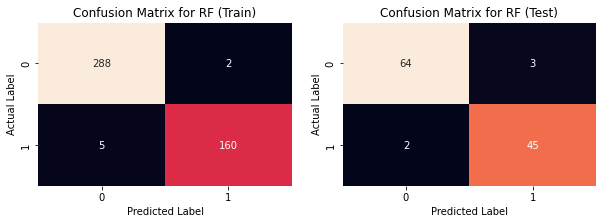

In [46]:
plt.figure(figsize=(10,3))

plt.subplot(1,2,1)
sns.heatmap(metrics.confusion_matrix(y_train,grid_rfcl_pred),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for RF (Train)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

plt.subplot(1,2,2)
sns.heatmap(metrics.confusion_matrix(y_test,grid_rfcl_pred1),annot=True,fmt='d',cbar=False)
plt.title('Confusion Matrix for RF (Test)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [47]:
print('Classification Report for the training set\n\n',metrics.classification_report(y_train, grid_rfcl_pred),'\n')
print('Classification Report \n\n',metrics.classification_report(y_test, grid_rfcl_pred1))

Classification Report for the training set

               precision    recall  f1-score   support

           B       0.98      0.99      0.99       290
           M       0.99      0.97      0.98       165

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455
 

Classification Report 

               precision    recall  f1-score   support

           B       0.97      0.96      0.96        67
           M       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

